<a href="https://colab.research.google.com/github/sarahrihan/Classification_project/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2



---

Name: Sarah Rihan

---



## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
df.info()   #This function was used to inspect the data types and the amount of null objects, to proceed with data cleaning properly.
            # discovered that SeniorCitizen was incorrectly loaded as numric while it should be object (boolean)
            # discovered that TotalCharges, and MonthlyCharges were incorrectly loaded as object while they should be numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6976,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,6180,7032
unique,6976,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1584,5783,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$20.05/m,$20.2,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,61,8,5163


In [ ]:
#the following lines were to check there were not any inconsistent or meaningless values
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

For the data inspection step:

We first started by checking each column in the dataset for null values and found that only custimerID & TotalCharges needed imputing

We also checked for column datatypes of each attribute and found that SeniorCitizen was numerical when it is object (boolean)

We also found that TotalCharges & MonthlyCharges both needed adjustments in regards to dataypes & naming conventions

## Data Cleaning

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '').str.strip() #removing the $ to allow to change the datatype
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '').str.strip() #removing the $ to allow to change the datatype
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '').str.strip() #removing the /m to allow to change the datatype

#change column names (tenure to in months) (MonthlyCharges to include /m and $) (TotalCharges to include $)
df = df.rename(columns={'MonthlyCharges': 'MonthlyCharges (/m) $', 'TotalCharges': 'TotalCharges $' ,'tenure': 'tenure (months)'})

#change monthly charges and total charges to float
#change senior citizen to boolean (object)
df['TotalCharges $'] = df['TotalCharges $'].astype(np.float64) #transformed float64 since it is numeric
df['MonthlyCharges (/m) $'] = df['MonthlyCharges (/m) $'].astype(np.float64) #transformed into float64 since it is numeric
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object) #transformed into object since it is numeric


#impute missing values for customerID and totalCharges
df['TotalCharges $'] = pd.to_numeric(df['TotalCharges $'], errors='coerce')
MeanTotalCharges = df['TotalCharges $'].mean()
df['TotalCharges $'] = df['TotalCharges $'].fillna(MeanTotalCharges)
df['customerID'] = df['customerID'].fillna('Missing') #we don't need this column CHECK

df['Contract']=pd.Categorical(df['Contract'],
                                categories=['Month-to-month', 'One year', 'Two year'],
                                ordered=True)
df['Contract']


df['gender'] = df['gender'].astype('category').cat.codes #female 0, male 1
df['gender']

df['Churn'] = df['Churn'].astype('category').cat.codes #no: 0 yes:1
df['Churn']

df['Partner'] = df['Partner'].astype('category').cat.codes
df['Partner']

df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['Dependents']

df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PhoneService']

df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['PaperlessBilling']

df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   customerID             7032 non-null   object  
 1   gender                 7032 non-null   int8    
 2   SeniorCitizen          7032 non-null   object  
 3   Partner                7032 non-null   int8    
 4   Dependents             7032 non-null   int8    
 5   tenure (months)        7032 non-null   int64   
 6   PhoneService           7032 non-null   int8    
 7   MultipleLines          7032 non-null   object  
 8   InternetService        7032 non-null   object  
 9   OnlineSecurity         7032 non-null   object  
 10  OnlineBackup           7032 non-null   object  
 11  DeviceProtection       7032 non-null   object  
 12  TechSupport            7032 non-null   object  
 13  StreamingTV            7032 non-null   object  
 14  StreamingMovies        7032 non-null   o

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure (months),PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges (/m) $,TotalCharges $,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
print(df['Churn'].value_counts()/df['Churn'].count())

Churn
0    0.734215
1    0.265785
Name: count, dtype: float64


In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6977
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure (months): Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges (/m) $: Number of unique values 1584
TotalCharges $: Number of unique values 5784
Churn: Number of unique values 2


In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
SeniorCitizen : [0 1]
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure (months),PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges (/m) $,TotalCharges $,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


For the data cleaning step:

1. TotalCharges: Dollar Sign was removed from attribute values in order to be able to properly convert its datatype from object to float. Attribute name is now "TotalCharges $"

2. MonthlyCharges: Dollar Sign & (/m) were removed from attribute values in order to be able to properly convert its datatype from object to float. Attribute name is now "MonthlyCharges(/m) $"

3. Missing Value imputing: TotalCharges missing values were replaced by the column's mean and customerID missing values were simply replaced with the word "missing"; proper handling of customerID missing values does not need to happen since the column will be dropped during model preparation anyway.

4. Datatype conversion:

  a- Contract column: changed to ordinal categorical

  b- Gender, Churn, Partner, Dependents, PhoneService, PaperlessBilling all changed to categorical columns and placed them in an array called "categorical_col"

5. customerID has shown that it's redundant as a column since it contains only unique values and therefore had to be dropped

6. Churn had the following values:

0:    0.734215

1    0.265785

Which meant that the dataset is not balanced and has more no-churn values than yes



## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

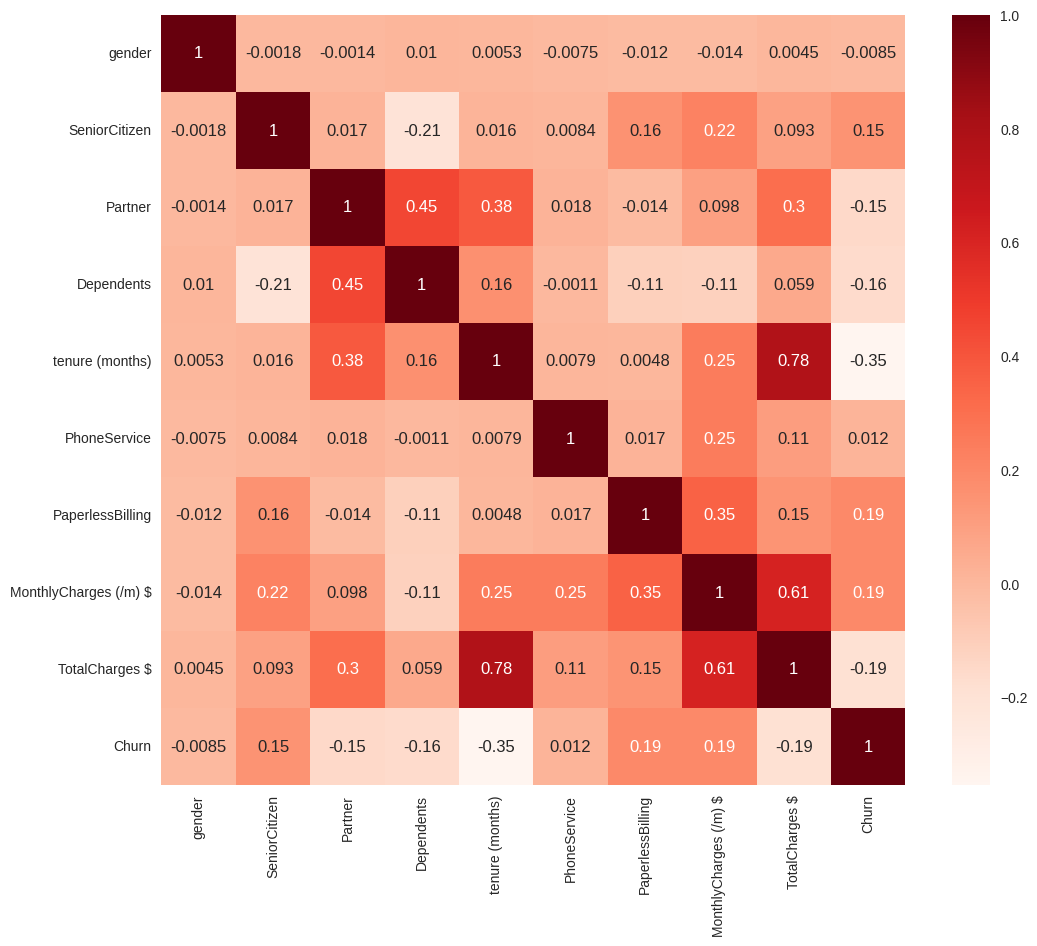

In [ ]:
df_boolean = df.select_dtypes(include=['bool', 'object']).copy()
for col in df_boolean.columns:
    if df[col].nunique() == 2:
        df[col] = df[col].map({True: 1, False: 0, 'Yes': 1, 'No': 0})


plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds'); #need to check

In [ ]:
print(categorical_col)
print(len(categorical_col))

['customerID', 'SeniorCitizen', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
11


<ipython-input-36-7f977a07020f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
<ipython-input-36-7f977a07020f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
<ipython-input-36-7f977a07020f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
<ipython-input-36-7f977a07020f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
<ipython-input-36-7f977a07020f>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after s

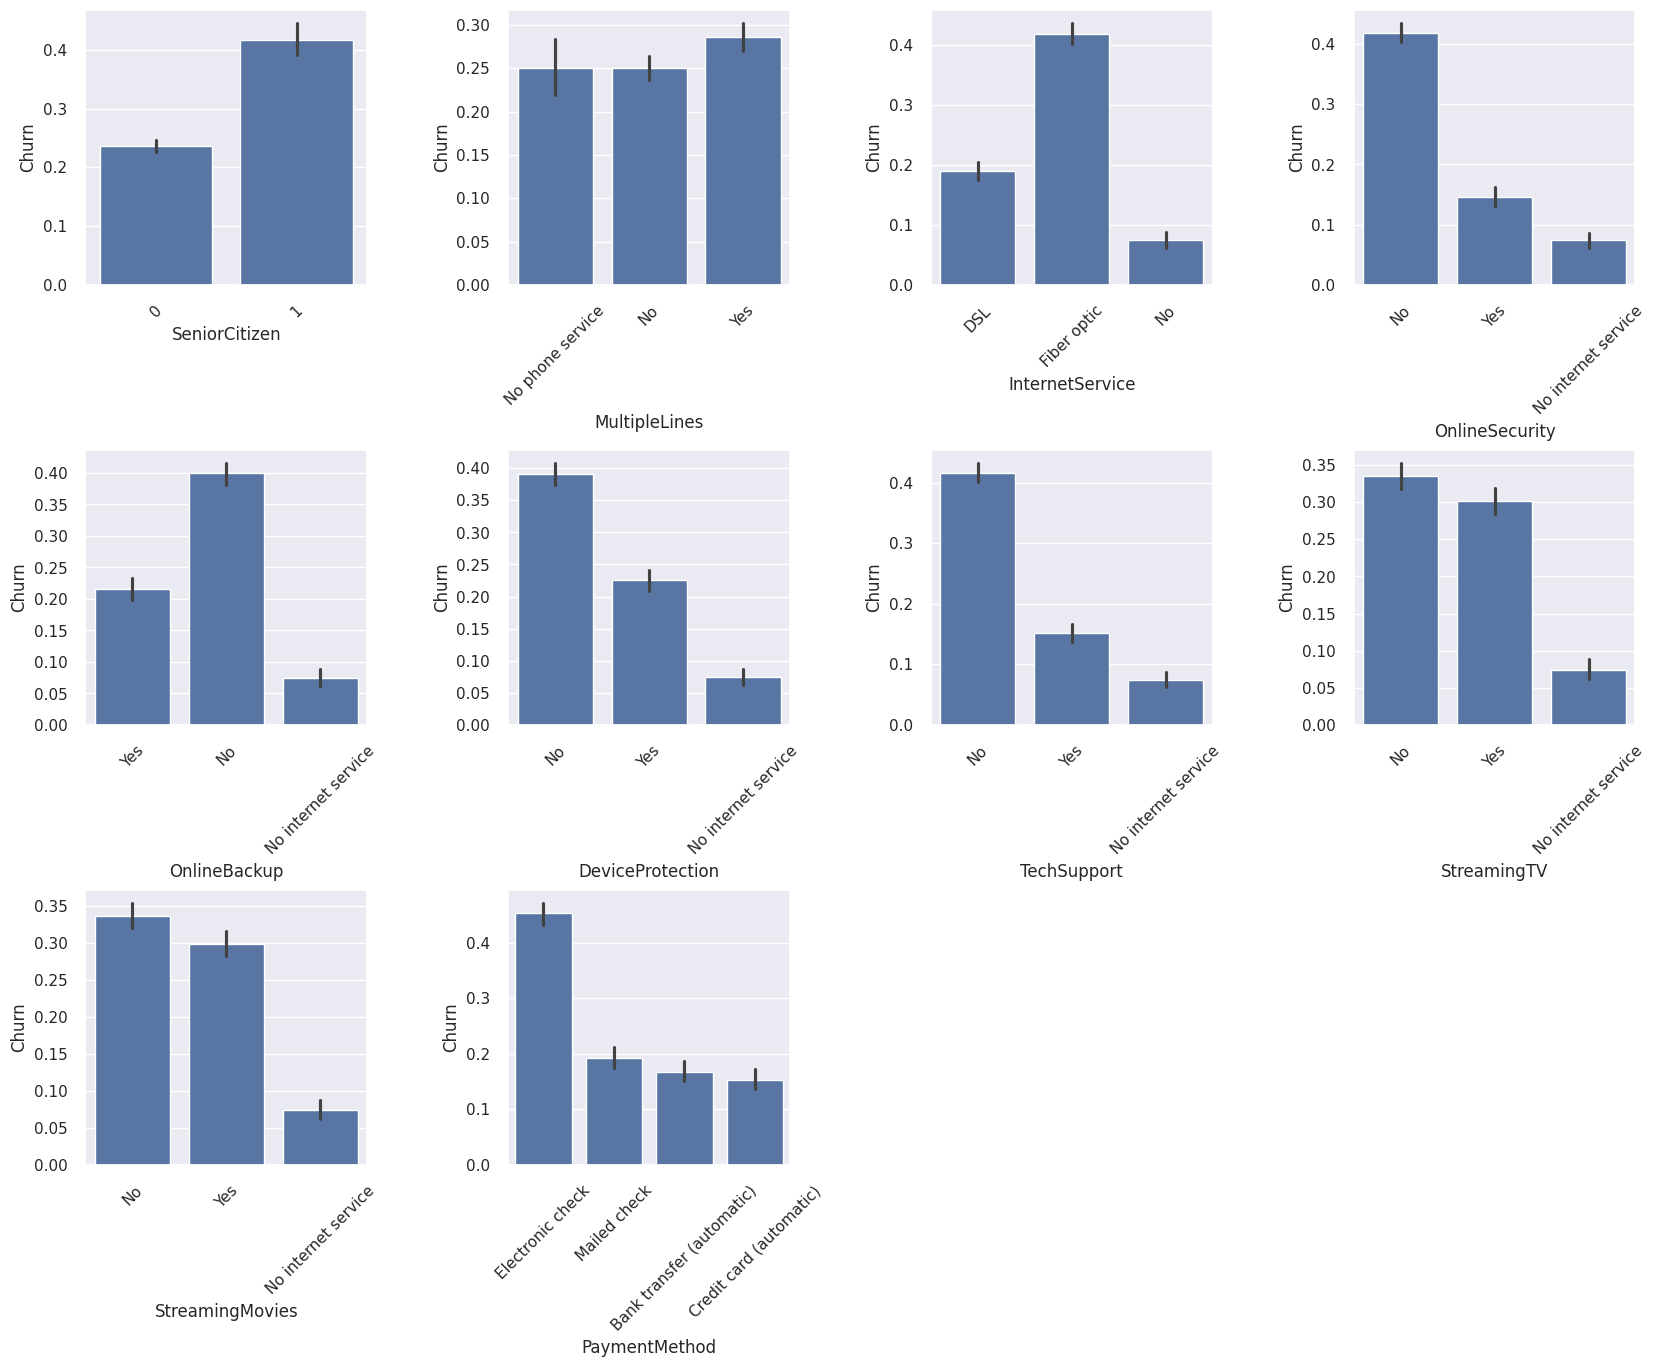

In [ ]:
categorical_features = categorical_col.copy()
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

if 'customerID' in categorical_features:
    categorical_features.remove('customerID')

sns.set(font_scale=1.0)
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(3,4 , i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.ylabel('Churn')
    plt.xlabel(f'{column}')

plt.subplots_adjust(hspace=0.6, wspace=0.5)
plt.show()

**Answer for Q1**:

For boolean columns we created a heatmap to check for their correlation with Churn column and the following was observed:

1. Gender & PhoneService both showed a very low correlation with Churn and therefore will be dropped

2. The rest of the columns showed high to medium correlation and therefore will be kept in the model


As for categorical columns, barplots were used to determine each categorical attribute's correlation with Churn.

Interpretation of each graph occurred by observing the difference between the bars of each value in a column, if the difference is drastic then that implies a correlation; for example, in the OnlineBackup column, the "No" shows a significantly larger bar than the others meaning customers who do not have Online Backup are more likely to churn in comparison to those who do. This means OnlineBackup is highly correlated with churn.

Based on this, the following columns will be dropped:

- MultipleLines

- StreamingTV & StreamingMovies (while the difference between bars seems big, we assumed that if a customer has no internet service then they would not be utilizing streaming services, so only the difference between "Yes" & "No" was observed)


The most correlated columns with Churn:

- Tenure (most correlated)
- SeniorCitizen
- Partner
- Dependents
- InternetService
- OnlineService
- OnlineBackup
- DeviceProtection
- TechSupport
- PaymentMethod
- Contract
- PaperlessBilling
- MonthlyCharges
- TotalCharges

**Q2: Which payment method has the highest churn rate?**

**Visualization**

<ipython-input-37-85faae171611>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


Text(0.5, 0, 'PaymentMethod')

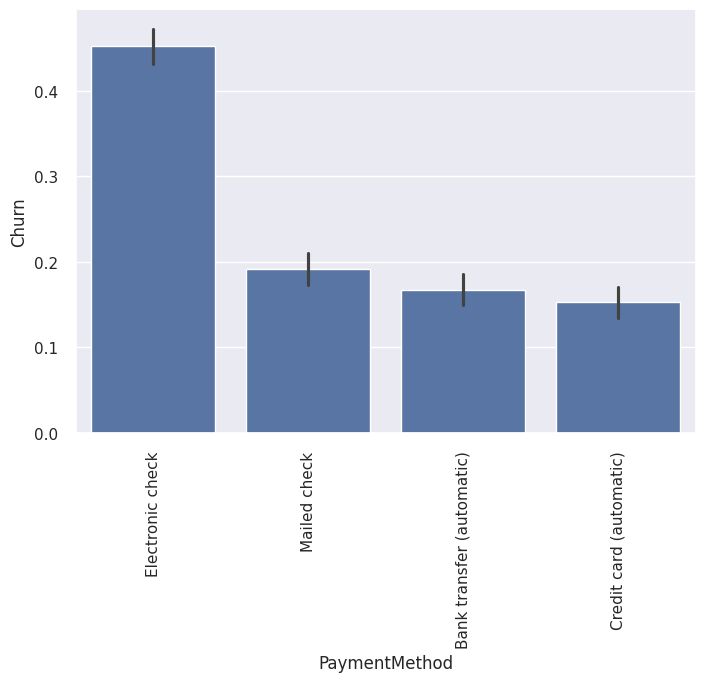

In [ ]:
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn')
plt.xlabel(f'{column}')

**Answer for Q2**:
Electronic check shows the highest churn rate by a wide margin compared to other payment methods

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

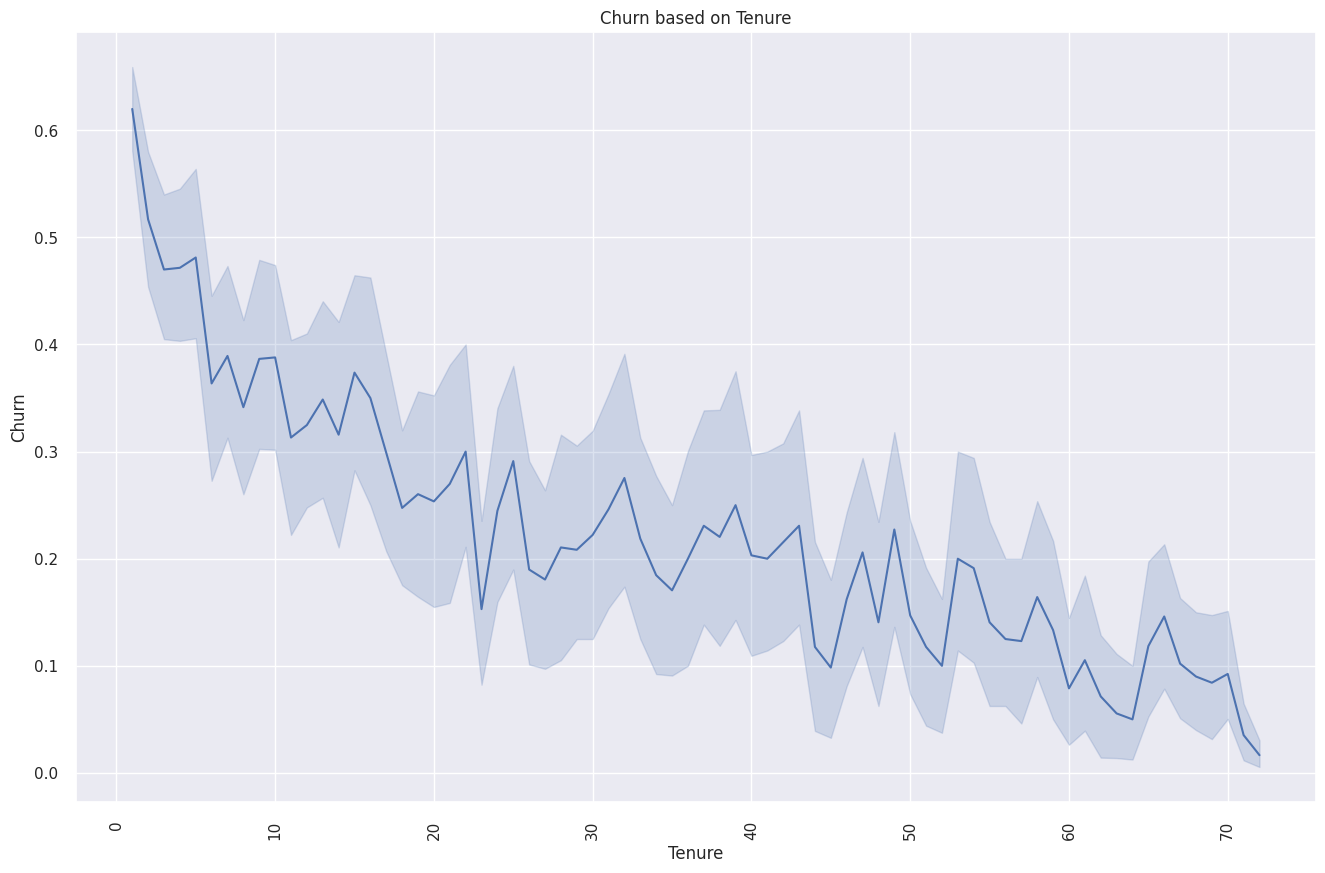

In [ ]:
plt.figure(figsize=(16, 10))
sns.lineplot(x='tenure (months)', y='Churn', data=df) #similar to the one above, a bar plot was chosen since it is useful for showing the distribution of values in numerical data
plt.xticks(rotation=90)
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.title("Churn based on Tenure")
plt.show()

<Axes: xlabel='tenure (months)', ylabel='Count'>

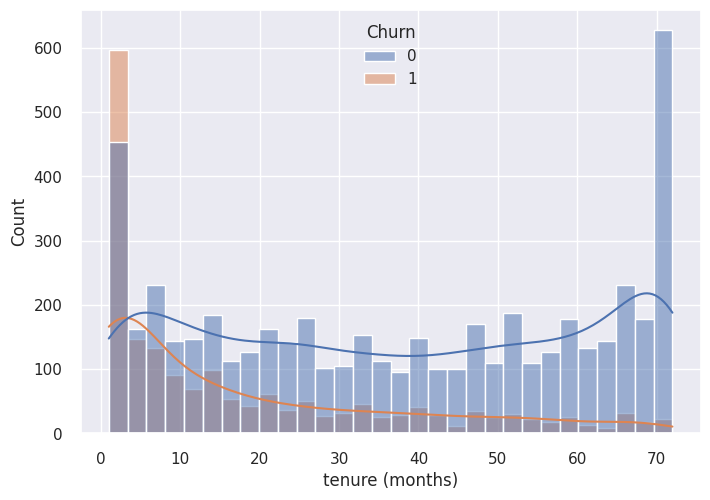

In [ ]:

Churn_mean=df['Churn'].mean() #obtaining the mean of churn
sns.histplot(data=df, x="tenure (months)", hue="Churn", kde=True, bins=30)


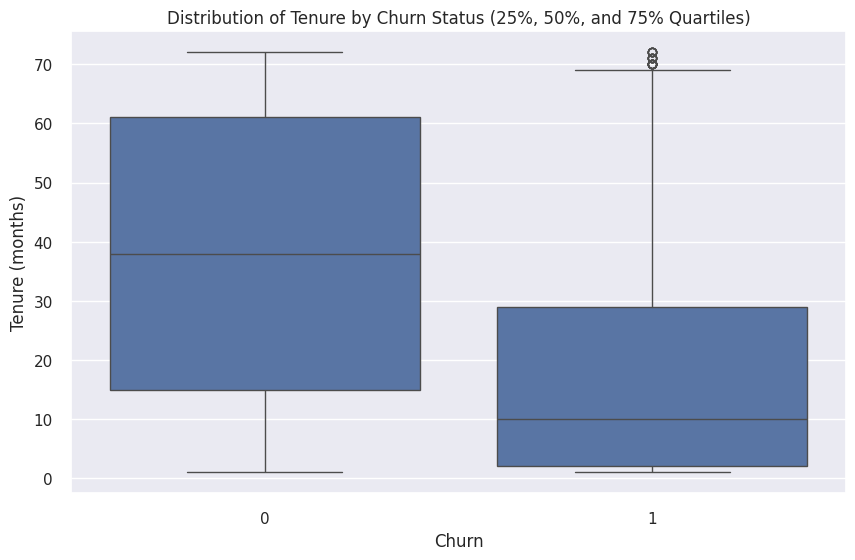

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="tenure (months)")
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.title("Distribution of Tenure by Churn Status (25%, 50%, and 75% Quartiles)")

plt.show()

**Answer for Q3**:
This histogram is binned on average of customer churn in relation to tenure in months.

Churned customers are seen in orange (and purple) and the orange line indicating churn is seen to be decreasing.


Non-churned customers are seen in blue and the blue line is seen to be stable with a slight increase when tenure increases. Indicating that churn and tenure have an inverse relationship, since as tenure increases the likelihood of churned customers decereases as seen in the orange line.


Customers have the highest churn rate in the initial months of using the service.

It's important to note that according to the graphs, as months of tenure increase, churn rate decreases in an almost linear fashion. That means that the longer a customer uses a service, the less likely they are to churn


BoxPlot:


median (50%):

- for non-churned customers it is around 35 to 40 months

- for churned customers it is around 10 months

Lower bound (25% quartile):

- for non-churned customers it is around 15 to 20 months

- for churned customers it is around 0 to 5 months

Upper bound (75% quartile):

- for non-churned customers it is around 60 months

- for churned customers it is around 25 to 30 months




## Data Preparation for Modelling



In [ ]:
df = df.drop(['gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies'], axis=1)
df.head()
if 'customerID' in categorical_col:
    categorical_col.remove('customerID')
categorical_col

if 'gender' in categorical_features:
    categorical_features.remove('gender')

if 'PhoneService' in categorical_features:
    categorical_features.remove('PhoneService')

if 'MultipleLines' in categorical_features:
    categorical_features.remove('MultipleLines')

if 'StreamingTV' in categorical_features:
    categorical_features.remove('StreamingTV')

if 'StreamingMovies' in categorical_features:
    categorical_features.remove('StreamingMovies')


df_encoded = pd.get_dummies(df, columns=categorical_features)
df_encoded = pd.get_dummies(df_encoded, columns=['Contract'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Partner                                  7032 non-null   int8   
 1   Dependents                               7032 non-null   int8   
 2   tenure (months)                          7032 non-null   int64  
 3   PaperlessBilling                         7032 non-null   int8   
 4   MonthlyCharges (/m) $                    7032 non-null   float64
 5   TotalCharges $                           7032 non-null   float64
 6   Churn                                    7032 non-null   int8   
 7   SeniorCitizen_0                          7032 non-null   bool   
 8   SeniorCitizen_1                          7032 non-null   bool   
 9   InternetService_DSL                      7032 non-null   bool   
 10  InternetService_Fiber optic              7032 no

In [ ]:
df_encoded.drop(['SeniorCitizen_0'], axis='columns', inplace=True)
df_encoded.columns

Index(['Partner', 'Dependents', 'tenure (months)', 'PaperlessBilling',
       'MonthlyCharges (/m) $', 'TotalCharges $', 'Churn', 'SeniorCitizen_1',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

Any column that needed to be dropped was removed from the categorical_col array so the classification could occur smoothly

Contract column was changed to categorical ordinal and therefore needed encoding

SeniorCitizen needed further encoding in order to remove redundant duplicate binary columns

## Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1) #defining "X" variable as every column that isn't Churn
y = df_encoded['Churn'] #defining "Y" variable as Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #data was split 70% training & 30% testing
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42) #initializing tree classifier
tree_clf.fit(X_train, y_train) #fitting training data on tree


DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [ ]:
!pip install graphviz

import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
output_path = '/content/tree_visualization.png'
graph.render(filename=output_path, format='png', cleanup=True)

print(f"Graph saved to {output_path}.png")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.618607 to fit


Graph saved to /content/tree_visualization.png.png


# Tree interpretation

If the tenure is greater than 67.5 months, and if the total charges are less than or equal to 6586.1 dollars and if the monthly charges are greater than 93.675 dollars and if the contract is less than or equal to 0.5 (month-to-month), then the customer is more likely to churn

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.78%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.997789     0.997698  0.997765     0.997744      0.997765
recall        0.999170     0.993884  0.997765     0.996527      0.997765
f1-score      0.998479     0.995787  0.997765     0.997133      0.997764
support    3614.000000  1308.000000  0.997765  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3611    3]
 [   8 1300]]

Test Result:
Accuracy Score: 70.71%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.818182    0.455951  0.707109     0.637066      0.721873
recall        0.772757    0.525847  0.707109     0.649302      0.707109
f1-score      0.794821    0.488411  0.707109     0.641616      0.713353
support    1549.000000  561.000000  

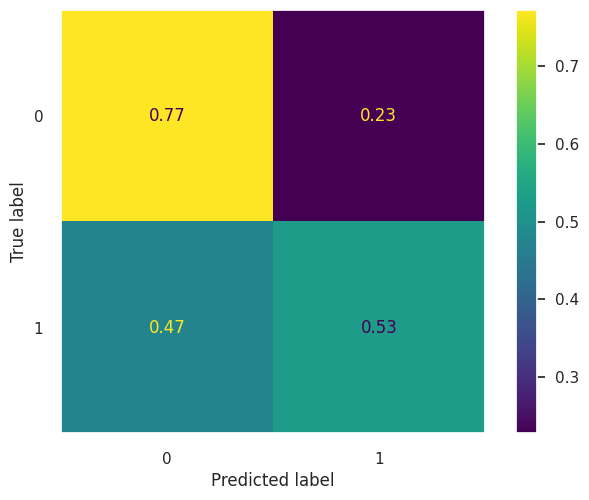

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4559505409582689
Recall:  0.5258467023172906
F1_score:  0.48841059602649006


## Evaluation explanation


The training accuracy score was shown to be 99.78% which is almost a 100%, which is the required score for training datasets, since training datasets learn with known class labels and are meant to be 100% accurate.
As for the testing dataset, it showed a 70.71% accuracy. However, since our dataset is imbalanced, with more instances of “no” for churn it is more important to look at precision and recall.
The precision shows a 81.8% accuracy in predicting non-churned customers, meaning the model accurately predicts whether a customer won’t churn. Moreover, it showed a 45% precision for predicting churned customers meaning that it was only accurate for predicting churned customers 45% of the time meaning there were a lot of false positives. As for the recall, the model predicted 77.3% of non-churned customers and could not predict 22.7% of them. Moreover, the recall for churned customers was 52.6% meaning that the model failed to predict 47.4% of them.
Moreover, for precision and recall for the entire model we look at the confusion matrix to measure them, our confusion matrix shows, 77% chance of a true negative, a 23% chance of a false positive, a 47% chance of a false negative, and a 53% chance of a true positive.
The overall precision is 45.6% reflects the fact that the model has a relatively undesirable number of false positives (23%), hence, this means that the model is only correct about churn 45% of the time.
As for overall recall, it is 52.6% meaning that the model correctly identifies more than half of the churned customers, however, almost half were not identified.
As for the F1-score, it is 48.8% meaning that the model has moderate performance, since the F1-score combines both the precision and recall.


## Bonus (Optional)